In [ ]:
#geting the data
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2023-11-10 03:06:54--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-11-10 03:06:54--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8620f9eee227891e3ca3231e61.dl.dropboxusercontent.com/cd/0/inline/CHNtM1fOui9MP-3m-LoYITDID1kBoVlQCmnbx_I9vEtl86pXr20ZNSf5-anmR7h4Tf3Rpxh4xrBFCtwAIe79JJkkQdvliJSe7hGBk9JPsc5fhCpZt2C4dg2nyjE96qaVnCEdsFT7FGiuduy7Aw1dt2Mh/file# [following]
--2023-11-10 03:06:54--  https://uc8620f9eee227891e3ca3231e61.dl.dropboxusercontent.com/cd/0/inline/CHNtM1fOui9MP-3m-LoYITDID1kBoVlQCmnbx_I9vEtl86pXr20ZNSf5-anmR7h4Tf3Rpxh4xrBFCtwAIe79JJkkQdvliJSe7hGBk9JPsc

In [ ]:
#unziping the data
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input



In [ ]:
#Pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

#Creating my model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='adam', loss= "categorical_crossentropy" , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1/255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


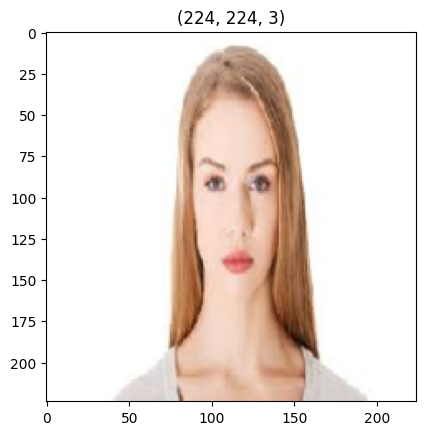

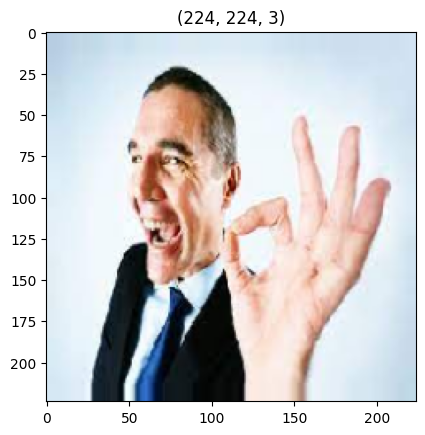

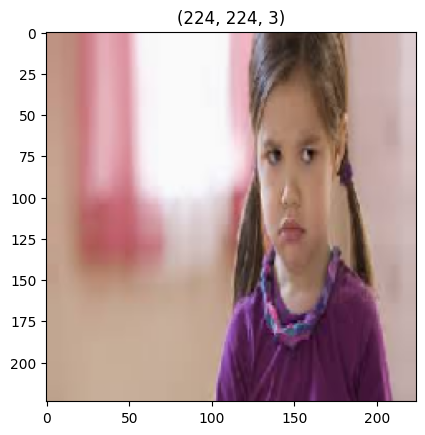

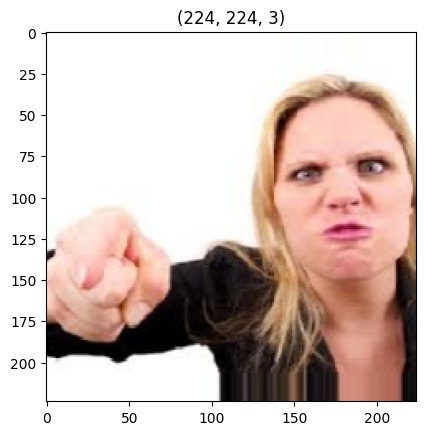

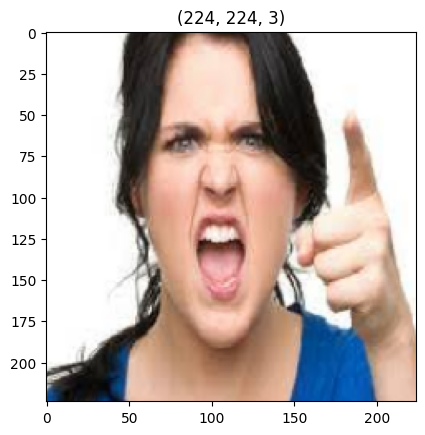

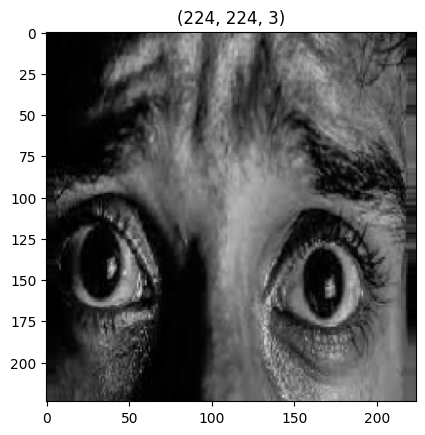

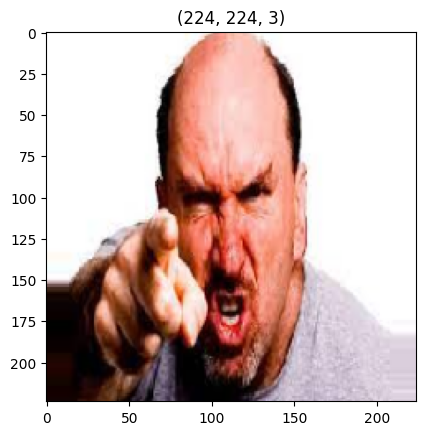

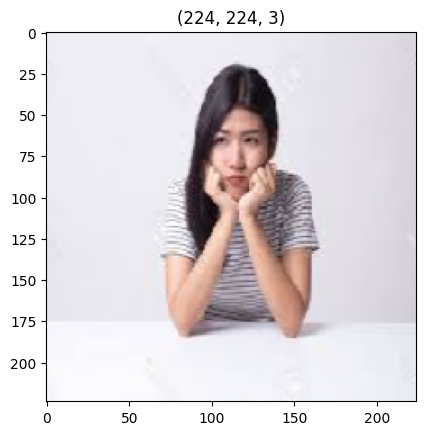

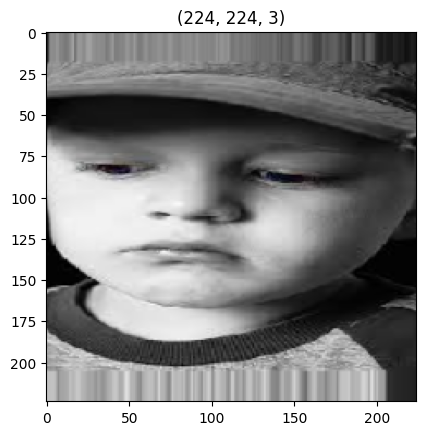

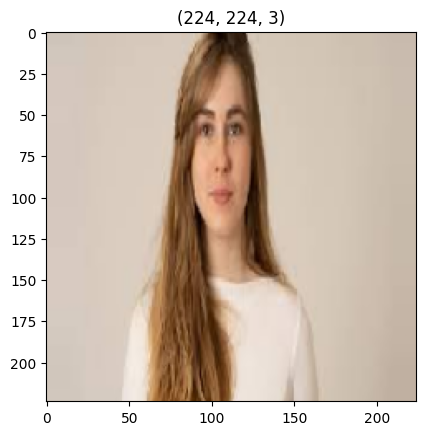

In [ ]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
#runs validation data along with the training process
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-11-e3242090d3de>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 8.7900 - accuracy: 0.2138
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to best_model.h5
10/10 [==============================] - 41s 4s/step - loss: 8.7900 - accuracy: 0.2138 - val_loss: 4.8628 - val_accuracy: 0.4688


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 2.7880 - accuracy: 0.5597
Epoch 2: val_accuracy improved from 0.46875 to 0.79297, saving model to best_model.h5
10/10 [==============================] - 28s 3s/step - loss: 2.7880 - accuracy: 0.5597 - val_loss: 1.1112 - val_accuracy: 0.7930
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.9353 - accuracy: 0.8113
Epoch 3: val_accuracy improved from 0.79297 to 0.83984, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 0.9353 - accuracy: 0.8113 - val_loss: 0.7721 - val_accuracy: 0.8398
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.8553
Epoch 4: val_accuracy improved from 0.83984 to 0.95312, saving model to best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 0.6642 - accuracy: 0.8553 - val_loss: 0.1766 - val_accuracy: 0.9531
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.229

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

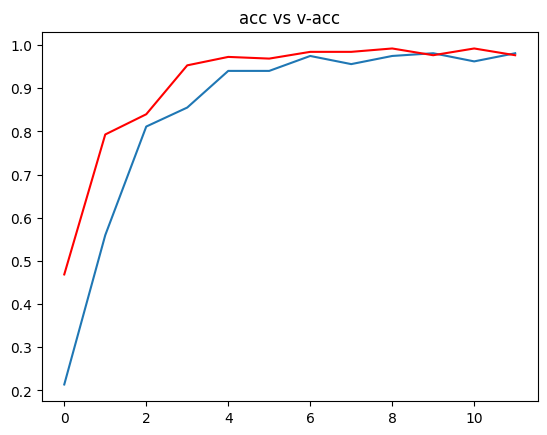

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

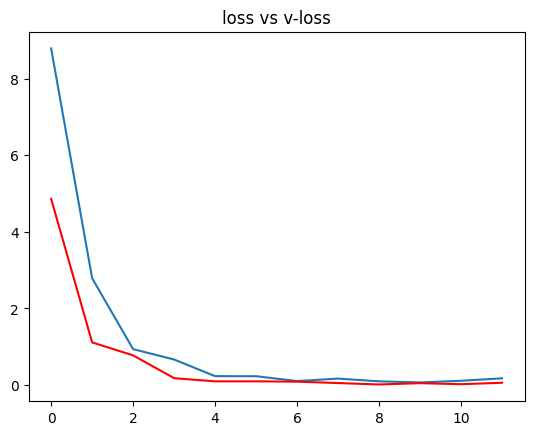

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 59ms/step
The person on this image is Happy


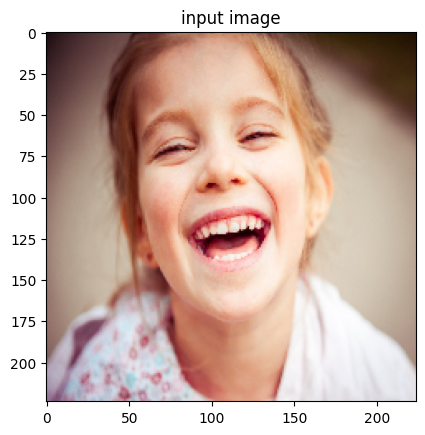

In [ ]:
# path for the image to see if it predics correct class

path = "/content/HappyKid.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"The person on this image is {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()